In [1]:
#Gustavo Vilares mariz de Oliveira
#DRE: 121073784

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
#Importar base de dados dos jogadores da NBA de um arquivo csv
dados = pd.read_csv("C:\\Users\\StarTrooper\\Desktop\\UFRJ\\Período III\\Álgebra Linear\\player_mvp_stats.csv")
dados = dados.iloc[:, 1:]

In [4]:
dados.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [5]:
#Agora, é preciso filtrar os dados inicialmente para avaliar quais deles de fato serão usados na análise.
dados_limpos = dados[['Player','Year','Pos','FG', 'FGA', '3P',
       '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]
dados_limpos

,Player,Year,Pos,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,A.C. Green,1991,PF,3.1,6.6,0.1,0.7,3.0,5.9,2.7,3.7,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1
1,Byron Scott,1991,SG,6.1,12.8,0.9,2.7,5.2,10.1,1.4,1.8,0.7,2.3,3.0,2.2,1.2,0.3,1.0,1.8,14.5
2,Elden Campbell,1991,PF,1.1,2.4,0.0,0.0,1.1,2.4,0.6,0.9,0.8,1.1,1.8,0.2,0.2,0.7,0.3,1.4,2.8
3,Irving Thomas,1991,PF,0.7,1.9,0.0,0.0,0.7,1.9,0.5,0.8,0.5,0.7,1.2,0.4,0.2,0.0,0.5,0.9,1.8
4,James Worthy,1991,SF,9.2,18.7,0.3,1.2,8.8,17.5,2.7,3.4,1.4,3.2,4.6,3.5,1.3,0.4,1.6,1.5,21.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Spencer Hawes,2017,PF,2.5,5.1,0.5,1.5,2.0,3.6,0.8,1.0,0.7,2.8,3.5,1.5,0.3,0.6,0.9,1.4,6.2
14088,Steve Novak,2017,PF,0.3,0.9,0.1,0.8,0.1,0.1,0.0,0.0,0.0,0.4,0.4,0.0,0.0,0.0,0.0,0.1,0.6
14089,Terrence Jones,2017,PF,4.3,9.1,0.4,1.4,3.9,7.7,1.9,3.1,1.2,4.5,5.7,1.1,0.7,1.0,0.9,1.2,10.8
14090,Thon Maker,2017,C,1.5,3.2,0.5,1.3,1.0,1.9,0.6,0.9,0.7,1.3,2.0,0.4,0.2,0.5,0.3,1.5,4.0


In [6]:
#Gerando a tabela com os dados médios dos jogadores em 2019
#dados_media = dados_limpos.groupby(['Player', 'Pos']).mean()
dados_media = dados_limpos[dados_limpos['Year'] == 2019]
dados_media = dados_media.drop(columns=['Year'])
dados_media = dados_media.groupby(['Player', 'Pos']).mean()
dados_media

,,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,Pos,,,,,,,,,,,,,,,,,
Aaron Gordon,PF,6.0,13.4,1.6,4.4,4.5,9.0,2.4,3.2,1.7,5.7,7.4,3.7,0.7,0.7,2.1,2.2,16.0
Aaron Holiday,PG,2.1,5.2,0.9,2.5,1.2,2.7,0.8,1.0,0.1,1.2,1.3,1.7,0.4,0.3,0.8,1.4,5.9
Abdel Nader,SF,1.5,3.5,0.5,1.6,1.0,1.9,0.4,0.6,0.2,1.7,1.9,0.3,0.3,0.2,0.4,1.1,4.0
Al Horford,C,5.7,10.6,1.1,3.0,4.6,7.6,1.1,1.4,1.8,5.0,6.7,4.2,0.9,1.3,1.5,1.9,13.6
Al-Farouq Aminu,PF,3.2,7.3,1.2,3.5,2.0,3.9,1.9,2.1,1.4,6.1,7.5,1.3,0.8,0.4,0.9,1.8,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zaza Pachulia,C,1.3,2.8,0.0,0.1,1.3,2.8,1.4,1.8,1.5,2.4,3.9,1.3,0.5,0.3,0.8,2.2,3.9
Zhaire Smith,SG,2.3,5.7,1.0,2.7,1.3,3.0,1.0,1.3,0.5,1.7,2.2,1.7,0.3,0.3,1.0,1.3,6.7
Zhou Qi,PF,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [7]:
#Padronizando os dados
scaler = StandardScaler()
dados_pad = scaler.fit_transform(dados_media)
dados_pad = pd.DataFrame(dados_pad)
dados_pad = dados_pad.set_axis(dados_media.index, axis=0)
dados_pad = dados_pad.set_axis(dados_media.columns, axis=1)
dados_pad = dados_pad.reset_index(level=1)
dados_pad

,Pos,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,
Aaron Gordon,PF,1.272041,1.387263,0.899131,0.893205,1.195880,1.335081,0.794331,0.857780,1.092776,1.542792,1.495009,1.003144,0.199350,0.762053,1.305157,0.581731,1.209970
Aaron Holiday,PG,-0.494730,-0.399280,0.029080,-0.014513,-0.610800,-0.535444,-0.422199,-0.484732,-0.937623,-0.831577,-0.913244,-0.124941,-0.527638,-0.225449,-0.335816,-0.403702,-0.444513
Abdel Nader,SF,-0.766541,-0.769660,-0.468092,-0.444484,-0.720296,-0.772971,-0.726332,-0.728825,-0.810723,-0.567758,-0.676367,-0.914600,-0.769968,-0.472324,-0.840731,-0.773240,-0.755752
Al Horford,C,1.136135,0.777224,0.277666,0.224361,1.250628,0.919409,-0.194100,-0.240639,1.219676,1.173446,1.218652,1.285165,0.684010,2.243306,0.547785,0.212194,0.816825
Al-Farouq Aminu,PF,0.003590,0.058250,0.401959,0.463234,-0.172817,-0.179154,0.414165,0.186524,0.712076,1.753848,1.534489,-0.350558,0.441680,0.021427,-0.209587,0.089014,0.128823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zaza Pachulia,C,-0.857144,-0.922170,-1.089557,-1.161104,-0.556053,-0.505753,0.034000,0.003454,0.838976,-0.198412,0.113224,-0.350558,-0.285309,-0.225449,-0.335816,0.581731,-0.772133
Zhaire Smith,SG,-0.404126,-0.290344,0.153373,0.081037,-0.556053,-0.446371,-0.270133,-0.301662,-0.430023,-0.567758,-0.557928,-0.124941,-0.769968,-0.225449,-0.083359,-0.526881,-0.313465
Zhou Qi,PF,-0.993050,-1.314338,-1.089557,-1.208879,-0.720296,-1.040189,-1.030464,-1.094964,-1.064522,-1.464742,-1.426479,-1.083812,-1.496957,-0.966075,-1.345646,-2.128210,-1.083372


In [8]:
#Entender a correlação entre as estatísticas e selecionar as 3 que mais se diferenciam
correlation = dados_pad.corr()
correlation

,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
FG,1.000000,0.976508,0.617041,0.620220,0.937711,0.944401,0.861345,0.862735,0.454332,0.735155,0.691711,0.685144,0.662250,0.443354,0.845574,0.638386,0.990095
FGA,0.976508,1.000000,0.714813,0.733188,0.866664,0.906085,0.843362,0.829813,0.325507,0.664895,0.598735,0.722899,0.682793,0.340472,0.853108,0.600353,0.982096
3P,0.617041,0.714813,1.000000,0.981657,0.305912,0.362897,0.476434,0.413112,-0.131146,0.272167,0.161473,0.480926,0.477485,-0.002765,0.498266,0.346342,0.680361
3PA,0.620220,0.733188,0.981657,1.000000,0.317735,0.376755,0.496673,0.434692,-0.145703,0.277387,0.160761,0.512064,0.496257,-0.005675,0.527554,0.344644,0.684665
2P,0.937711,0.866664,0.305912,0.317735,1.000000,0.983018,0.831762,0.861419,0.606684,0.768809,0.764973,0.617487,0.591141,0.537607,0.803019,0.619259,0.897864
2PA,0.944401,0.906085,0.362897,0.376755,0.983018,1.000000,0.839727,0.859732,0.533623,0.732910,0.715263,0.666973,0.621141,0.467216,0.834114,0.602895,0.911871
FT,0.861345,0.843362,0.476434,0.496673,0.831762,0.839727,1.000000,0.984945,0.398089,0.681280,0.634182,0.628521,0.548721,0.399300,0.810877,0.535378,0.901270
FTA,0.862735,0.829813,0.413112,0.434692,0.861419,0.859732,0.984945,1.000000,0.472910,0.718972,0.685782,0.618401,0.558204,0.449152,0.819889,0.573522,0.890817
ORB,0.454332,0.325507,-0.131146,-0.145703,0.606684,0.533623,0.398089,0.472910,1.000000,0.733211,0.860113,0.097300,0.292457,0.669417,0.341372,0.576442,0.397563
DRB,0.735155,0.664895,0.272167,0.277387,0.768809,0.732910,0.681280,0.718972,0.733211,1.000000,0.977275,0.430576,0.527070,0.659193,0.660122,0.692887,0.714340


In [9]:
#Todos os jogadores
est = ['3P', 'AST', 'BLK']
todos = dados_pad[['Pos','3P', 'AST', 'BLK']]

#Planilha dos armadores
armadores = dados_pad[dados_pad['Pos'] == 'PG']
armadores = armadores[est].transpose()

#Planilha dos ala-armadores
ala_armadores = dados_pad[dados_pad['Pos'] == 'SG']
ala_armadores = ala_armadores[est].transpose()

#Planilha dos alas
alas = dados_pad[dados_pad['Pos'] == 'SF']
alas = alas[est].transpose()

#Planilha dos alas de força
ala_forca = dados_pad[dados_pad['Pos'] == 'PF']
ala_forca = ala_forca[est].transpose()

#Planilha dos pivôs
pivos = dados_pad[dados_pad['Pos'] == 'C']
pivos = pivos[est].transpose()


In [10]:
#Criando lista de posições para colorir o plot
pos_num = []
for x in range(len(todos.index)):
        if todos['Pos'][x][0:2] == 'PG' :
            pos_num.append(1)
        if todos['Pos'][x][0:2] == 'SG':
            pos_num.append(2)
        if todos['Pos'][x][0:2] == 'SF':
            pos_num.append(3)
        if todos['Pos'][x][0:2] == 'PF':
            pos_num.append(4)
        if todos['Pos'][x][0:1] == 'C':
            pos_num.append(5)
        

<IPython.core.display.Javascript object>


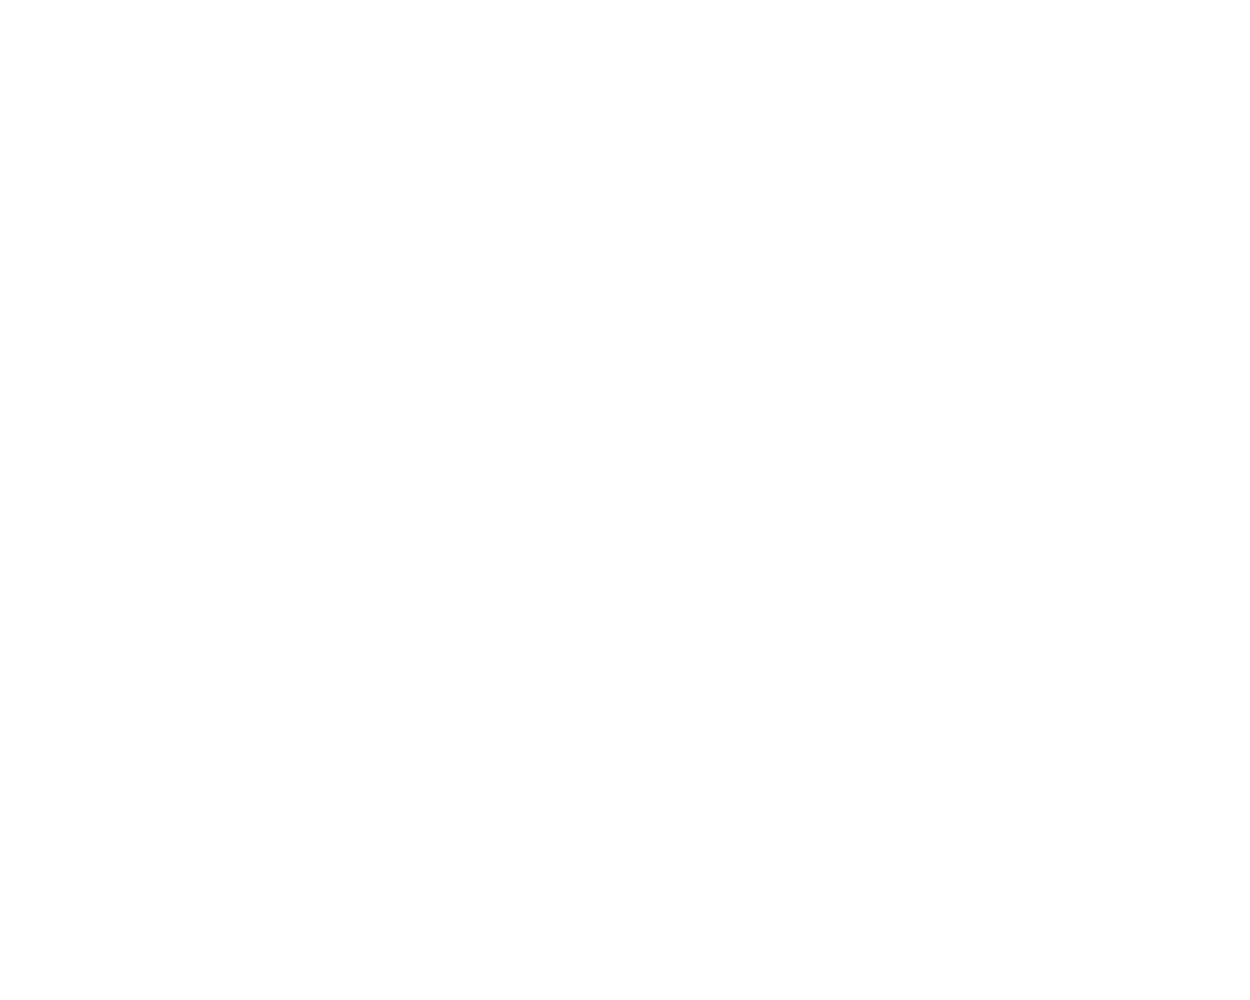

Text(0.5, 0, 'BLK')

In [11]:
%matplotlib notebook
plt.figure(figsize = (10, 8))
ax = plt.axes(projection = '3d')
fg = ax.scatter3D(xs = todos[est[0]], ys = todos[est[1]], zs = todos[est[2]], c = pos_num)
ax.set_xlabel(est[0])
ax.set_ylabel(est[1])
ax.set_zlabel(est[2])

In [12]:
def compara_posicao(jogador, posicao):
    
    #Pegar a tabela da posicao desejada e incluir o jogador a ser comparado
    teste = posicao.copy()
    if 'jogador' not in posicao.columns :
        teste[jogador] = dados_pad.loc[jogador][[posicao.index[0], posicao.index[1], posicao.index[2]]]
    #Realizar o SVD para gerar o plano dos armadores e a projeção dos jogadores nele
    testef = np.matrix(teste, dtype='float')
    plano, s, jogadores = np.linalg.svd(testef, full_matrices=True)
    plano = np.array(plano)
    jogadores = np.array(jogadores)
    plano = plano[:,:2]
    jogadores = jogadores[:2,:]
    s = s[0:2]
    jogadores = pd.DataFrame(jogadores)
    jogadores = jogadores.set_axis(teste.columns, axis=1)
    
    #Conferir as projeções com o resultado do SVD
    jogadores[:1] *= s[0]
    jogadores[1:2] *= s[1]
    Proj = pd.DataFrame(np.dot(plano,jogadores)) 
    Proj = Proj.set_axis(teste.columns, axis=1)
    Proj = Proj.set_axis(teste.index, axis=0)
    d = teste[jogador].subtract(Proj[jogador])
    d = np.linalg.norm(d)
    return d

In [13]:
def descobre_posicao(jogador):
    d = []
    d.append(compara_posicao(jogador, armadores))
    d.append(compara_posicao(jogador, ala_armadores))
    d.append(compara_posicao(jogador, alas))
    d.append(compara_posicao(jogador, ala_forca))
    d.append(compara_posicao(jogador, pivos))
    return d
    

In [14]:
def acerto():
    acertos = 0
    erros = 0
    tentativas = 0
    for i in range (len(dados_pad.index)):
            pos = pos_num[i]
            prev = descobre_posicao(dados_pad.index[i])
            if prev[pos-1] == min(prev):
                acertos+=1
            else:
                erros+=1
            tentativas+=1       
    return acertos, erros, tentativas
            
            
        

In [15]:
acerto()

(162, 368, 530)

In [16]:
def acerto_aprox():
    acertos = 0
    erros = 0
    tentativas = 0
    errados = []
    for i in range (len(dados_pad.index)):
            pos = pos_num[i] - 1
            prev = descobre_posicao(dados_pad.index[i])
            ac = 0
            if prev[pos] == min(prev):
                acertos+=1
                ac = 1
            else:
                if pos == 0:
                    if prev[1] == min(prev):
                            acertos+=1
                            ac = 1
                if pos == 1:
                    if prev[0] == min(prev):
                            acertos+=1
                            ac = 1
                    if prev[2] == min(prev):
                            acertos+=1
                            ac = 1
                if pos == 2:
                    if prev[1] == min(prev):
                            acertos+=1
                            ac = 1
                    if prev[3] == min(prev):
                            acertos+=1
                            ac = 1
                if pos == 3:
                    if prev[2] == min(prev):
                            acertos+=1
                            ac = 1
                    if prev[4] == min(prev):
                            acertos+=1
                            ac = 1
                if pos == 4:
                    if prev[3] == min(prev):
                            acertos+=1
                            ac = 1
                    if prev[2] == min(prev):
                            acertos+=1
                            ac = 1
            if ac == 0:
                erros += 1
                errados.append(dados_pad.index[i])
            tentativas+=1       
    return acertos, erros, tentativas

In [17]:
acerto_aprox()

(345, 185, 530)

In [18]:
#Será que existe um modelo melhor para definir as 5 posições de hoje?
#Podemos usar um cluster para descobrir
dados_cluster = dados_pad.drop(columns=['Pos'])
kmeans_model = KMeans(n_clusters = 4, random_state = 1)
kmeans_model.fit(dados_cluster)
labels = kmeans_model.labels_


<IPython.core.display.Javascript object>


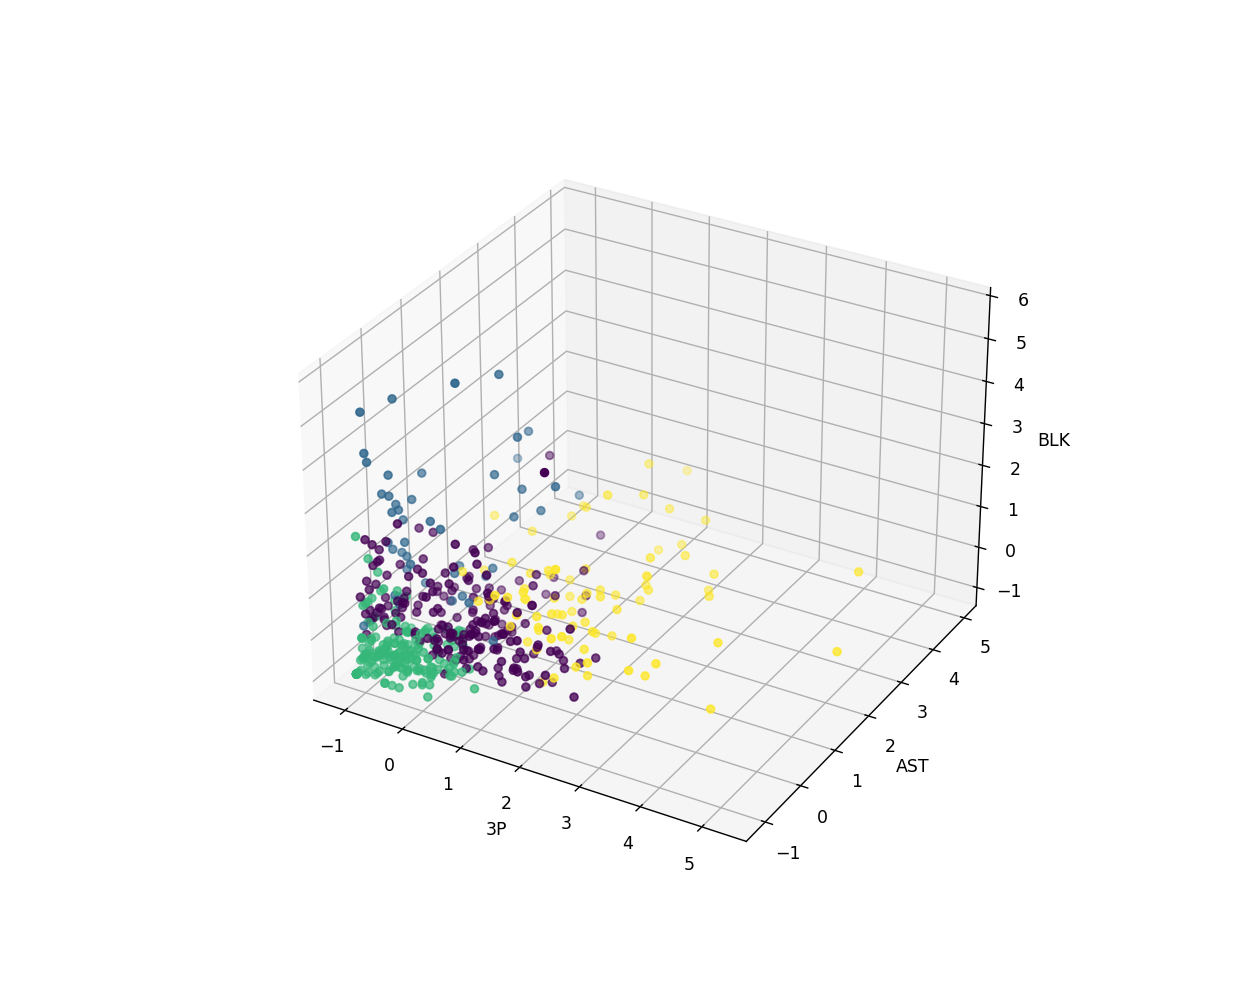

Text(0.5, 0, 'BLK')

In [19]:
%matplotlib notebook
plt.figure(figsize = (10, 8))
ax = plt.axes(projection = '3d')
fg = ax.scatter3D(xs = todos[est[0]], ys = todos[est[1]], zs = todos[est[2]], c = labels)
ax.set_xlabel(est[0])
ax.set_ylabel(est[1])
ax.set_zlabel(est[2])

In [20]:
#Agora, realizarei as análises dos planos com svd, porém ao invés da posição, usarei o cluster
dados_cluster = dados_pad.assign(Cluster = labels)
dados_cluster = dados_cluster.drop(columns=['Pos'])

In [21]:
#Agora para os clusters
#Planilha do cluster 0
c0 = dados_cluster[dados_cluster['Cluster'] == 0]
c0 = c0[est].transpose()

#Planilha do cluster 1
c1 = dados_cluster[dados_cluster['Cluster'] == 1]
c1 = c1[est].transpose()

#Planilha do cluster 2
c2 = dados_cluster[dados_cluster['Cluster'] == 2]
c2 = c2[est].transpose()

#Planilha do cluster 3
c3 = dados_cluster[dados_cluster['Cluster'] == 3]
c3 = c3[est].transpose()


In [22]:
def descobre_posicao_cluster(jogador):
    d = []
    d.append(compara_posicao(jogador, c0))
    d.append(compara_posicao(jogador, c1))
    d.append(compara_posicao(jogador, c2))
    d.append(compara_posicao(jogador, c3))
    return d
    

In [23]:
def acerto_cluster():
    acertos = 0
    erros = 0
    tentativas = 0
    for i in range (len(dados_pad.index)):
            pos = labels[i]
            prev = descobre_posicao_cluster(dados_pad.index[i])
            pos_prev = prev[pos]
            if pos_prev != min(prev):
                erros+=1
            else:
                acertos+=1
            tentativas+=1
    return acertos, erros, tentativas

In [24]:
acerto_cluster()

(236, 294, 530)

In [ ]:
#Com o Cluster tivemos um acerto bem maior do que com as posições originais, mas ainda não exato